In [56]:
import seaborn as sns
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

plt.rcParams['font.family'] = 'avenir'
font = {
    'family': 'avenir',  # Font family (e.g., 'serif', 'sans-serif', 'monospace')
#     'weight': 'bold',   # Font weight (e.g., 'normal', 'bold', 'light', 'heavy')
    'size': 14           # Font size
}

# Set the font properties
sns.set(font_scale=1.2)  
sns.set(rc={'font.family': font})

In [40]:
sns.set_style("white")

In [2]:
df = pd.read_csv('sample-playlist-audio-features.csv')
df.head()

,song,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (ms)
0,Gold Digger,0.629,0.696,1.0,-5.572,0.0,0.3480,0.0195,0.000000,0.0554,0.623,93.034,207627.0
1,All Falls Down,0.657,0.734,8.0,-4.832,0.0,0.4840,0.1490,0.000000,0.1390,0.434,91.030,223507.0
2,Hurricane,0.757,0.825,7.0,-4.062,0.0,0.0701,0.0398,0.000003,0.0798,0.446,95.010,243987.0
3,Life Of The Party (with André 3000),0.502,0.714,2.0,-6.668,1.0,0.2570,0.1380,0.000000,0.9700,0.305,79.136,391656.0
4,Jail,0.647,0.582,10.0,-9.538,0.0,0.0755,0.4100,0.000002,0.0715,0.915,167.396,146480.0


# Number of Songs

In [3]:
df.shape[0]

37

# How Alive is Your Playlist?

In [69]:
s = df[['Danceability', 'Energy', 'Liveness', 'Valence']].mean()
df1 = s.to_frame().reset_index()
df1.rename(columns={'index': 'theta', 0: 'r'}, inplace=True)

# Create a polar plot with filled areas using go.Scatterpolar
fig = go.Figure()

color_with_opacity = "#1DB954"
fill_opacity = 0.5
fig.add_trace(go.Scatterpolar(
    r=df1['r'],
    theta=df1['theta'],
    fill='toself',
    fillcolor=f'rgba{tuple(int(color_with_opacity[i:i+2], 16) for i in (1, 3, 5)) + (fill_opacity,)}',
    name='Average Values'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    showlegend=False,
     template='plotly_dark'  # Set the built-in theme here
)

fig.show()

# How Technical is your playlist?

In [68]:
# Calculate the mean values
s = df[['Acousticness', 'Instrumentalness', 'Speechiness', 'Liveness']].mean()
df1 = s.to_frame().reset_index()
df1.rename(columns={'index': 'theta', 0: 'r'}, inplace=True)

# Create a polar plot with filled areas using go.Scatterpolar
fig = go.Figure()

color_with_opacity = "#1DB954"
fill_opacity = 0.5
fig.add_trace(go.Scatterpolar(
    r=df1['r'],
    theta=df1['theta'],
    fill='toself',
    fillcolor=f'rgba{tuple(int(color_with_opacity[i:i+2], 16) for i in (1, 3, 5)) + (fill_opacity,)}',
    line=dict(color='#1DB954'),  # Line color
    name='Average Values'
))

# Customize the polar layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    showlegend=False,
    template='plotly_dark'  # Set the template/theme
)

fig.show()

# Playlist Song Key's

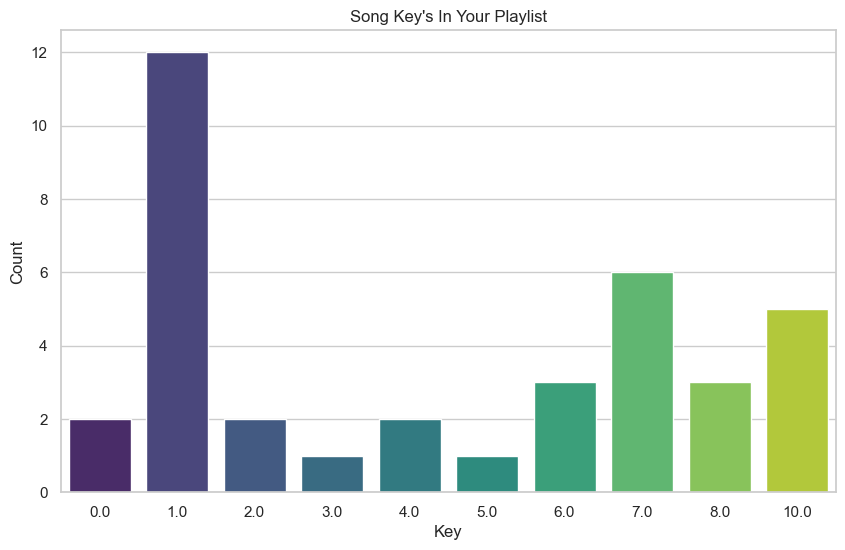

In [75]:

sns.set(style="whitegrid")  # Set the style of the plot
keys = df.Key.value_counts().sort_index(ascending = True)
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x="Key", y="count", data=keys.reset_index(), palette="viridis")  # Create the barplot

plt.title("Song Key\'s In Your Playlist")  # Set the title
plt.xlabel("Key")  # Set the x-axis label
plt.ylabel("Count")  # Set the y-axis label

plt.show()  # Display the plot

In [18]:

# keys = df.Key.value_counts().sort_index(ascending = True)
# g = sns.barplot(x=keys.index,y=keys.values, hue = keys.index,legend=False)
# g.set(title = 'Song Key\'s In Your Playlist',ylabel='Song Count')


# Tempo Distribution

Text(0.5, 1.0, 'Tempo Distribution')

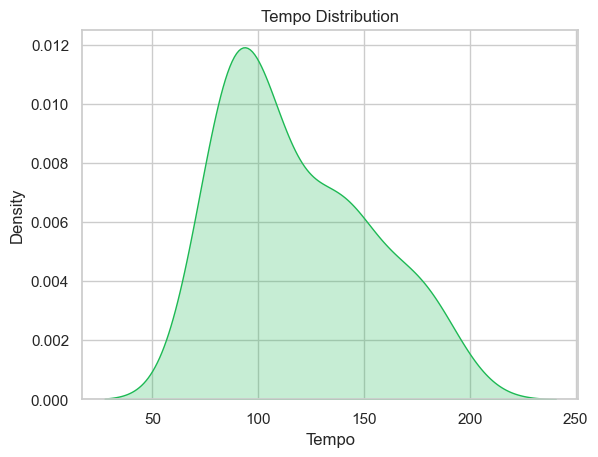

In [71]:
sns.kdeplot(data=df, x='Tempo', fill=True, color="#1DB954")
plt.title("Tempo Distribution")

### Avg Tempo

In [78]:
df.Tempo.mean()

118.29275675675676

# Duration Distribution

Text(0.5, 1.0, 'Song Duration-Distribution')

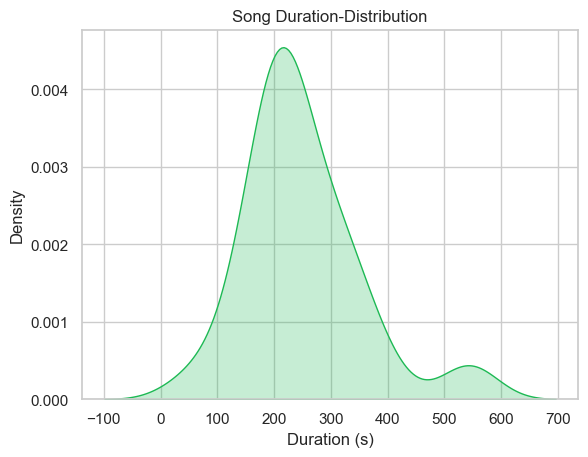

In [73]:
df['Duration (s)'] = df['Duration (ms)'] / 1000
sns.kdeplot(data=df, x='Duration (s)', fill = True, color="#1DB954")
plt.title("Song Duration-Distribution")

### Avg Duration (Seconds)

In [25]:
df['Duration (s)'].mean()

248.92951351351357

# Tempo and Duration by Song

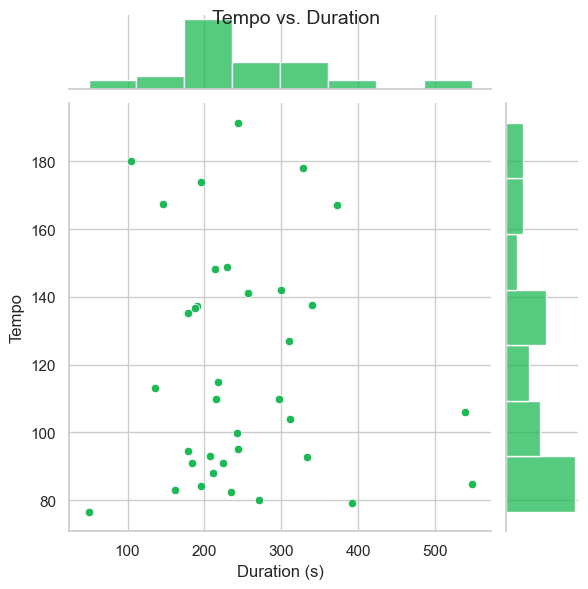

In [49]:
# Create a joint plot
g = sns.jointplot(data=df, x='Duration (s)', y='Tempo', kind="scatter", color="#1DB954")

# Set the title using the Matplotlib figure
g.fig.suptitle('Tempo vs. Duration', fontsize=14)

# Show the plot
plt.show()

In [29]:
# 1DB954

# Loudness (negative is louder, dB's are weird)

Text(0.5, 1.0, 'Loudness Distribution')

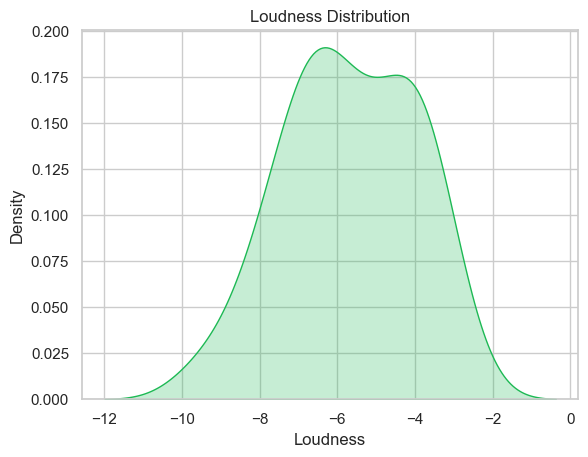

In [51]:
sns.kdeplot(data = df, x = 'Loudness', fill =True, color='#1DB954')
plt.title("Loudness Distribution")

### Your loudest song

In [76]:
df[df.Loudness ==df.Loudness.max()][['song', 'Loudness']]['song']

35    Bound 2
Name: song, dtype: object

### Your quietest song

In [101]:
df[df.Loudness == df.Loudness.min()][['song', 'Loudness']]

,song,Loudness
4,Jail,-9.538


In [78]:
test = [('Kanye West', 'Gold Digger'), ('Kanye West', 'All Falls Down'), ('Kanye West', 'Hurricane'), ('Kanye West', 'Life Of The Party (with André 3000)'), ('Kanye West', 'Jail'), ('Kanye West', 'Come to Life'), ('Kanye West', 'Believe What I Say'), ('Kanye West', 'No Child Left Behind'), ('Kanye West', 'God Breathed'), ('Kanye West', 'Lord I Need You'), ('Kanye West', 'Jail pt 2'), ('Kanye West', 'Good Morning'), ('Kanye West', 'Stronger'), ('Kanye West', "Can't Tell Me Nothing"), ('Kanye West', 'Famous'), ('Kanye West', 'Hell Of A Life'), ('Kanye West', 'All Of The Lights'), ('Kanye West', 'I Wonder'), ('Kanye West', 'Wash Us In The Blood'), ('The Game', 'Eazy'), ('Kanye West', 'Violent Crimes'), ('Kanye West', 'Follow God'), ('Kanye West', 'Use This Gospel'), ('Kanye West', 'Jesus Is Lord'), ('Kanye West', 'Feedback'), ('Kanye West', 'Father Stretch My Hands Pt. 1'), ('Kanye West', 'Jesus Lord'), ('Kanye West', 'New Again'), ('Kanye West', 'Moon'), ('Kanye West', 'Off The Grid'), ('JAY-Z', 'Otis'), ('Kanye West', 'Saint Pablo'), ('Kanye West', 'Champion'), ('Kanye West', 'Runaway'), ('Kanye West', 'New Slaves'), ('Kanye West', 'Bound 2'), ('Kanye West', 'Heartless')]
song_dict = {song: artist for artist, song in test}

# Print the resulting dictionary
print(song_dict)

{'Gold Digger': 'Kanye West', 'All Falls Down': 'Kanye West', 'Hurricane': 'Kanye West', 'Life Of The Party (with André 3000)': 'Kanye West', 'Jail': 'Kanye West', 'Come to Life': 'Kanye West', 'Believe What I Say': 'Kanye West', 'No Child Left Behind': 'Kanye West', 'God Breathed': 'Kanye West', 'Lord I Need You': 'Kanye West', 'Jail pt 2': 'Kanye West', 'Good Morning': 'Kanye West', 'Stronger': 'Kanye West', "Can't Tell Me Nothing": 'Kanye West', 'Famous': 'Kanye West', 'Hell Of A Life': 'Kanye West', 'All Of The Lights': 'Kanye West', 'I Wonder': 'Kanye West', 'Wash Us In The Blood': 'Kanye West', 'Eazy': 'The Game', 'Violent Crimes': 'Kanye West', 'Follow God': 'Kanye West', 'Use This Gospel': 'Kanye West', 'Jesus Is Lord': 'Kanye West', 'Feedback': 'Kanye West', 'Father Stretch My Hands Pt. 1': 'Kanye West', 'Jesus Lord': 'Kanye West', 'New Again': 'Kanye West', 'Moon': 'Kanye West', 'Off The Grid': 'Kanye West', 'Otis': 'JAY-Z', 'Saint Pablo': 'Kanye West', 'Champion': 'Kanye Wes